# Machine Learning for Everyone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df= pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

## Data Preparation

In [4]:
## ubah data type si class awal nya 'g' dan 'h' , karena binary, agar lebih mudah maka diubah menjadi 1 dan 0
df["class"] = (df["class"] == "g").astype(int)

In [5]:
df["class"].unique()

array([1, 0])

In [6]:
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [7]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


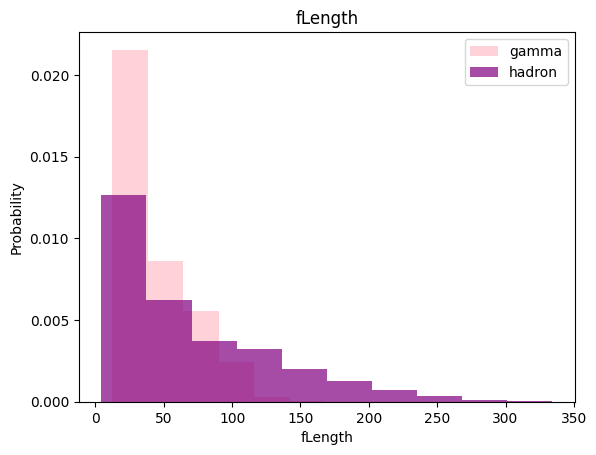

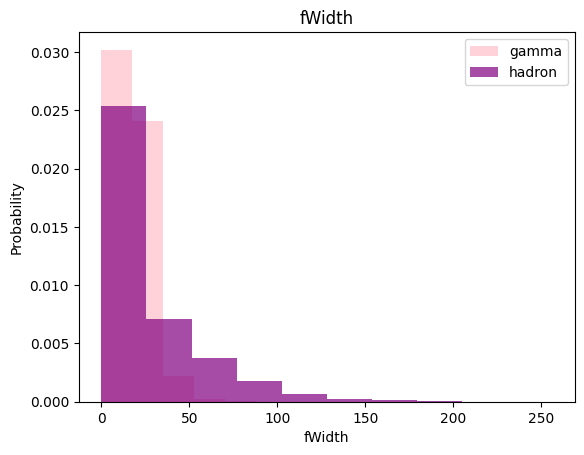

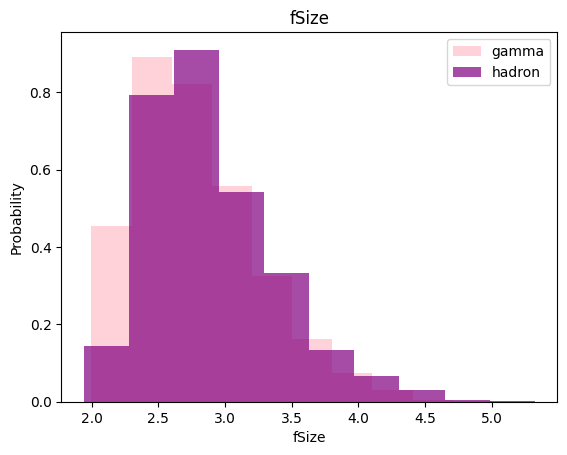

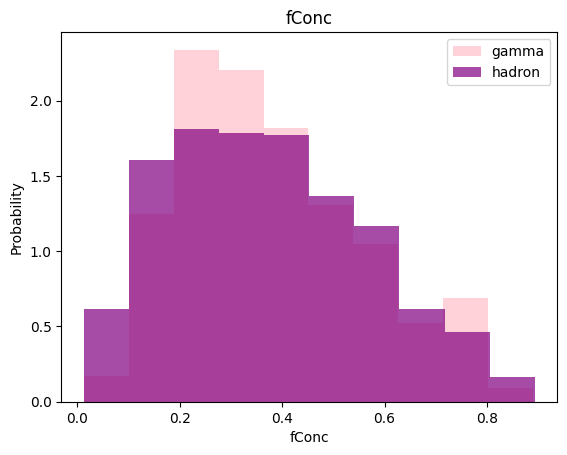

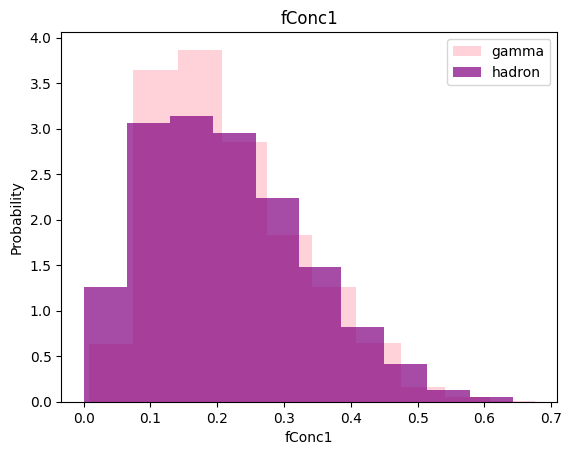

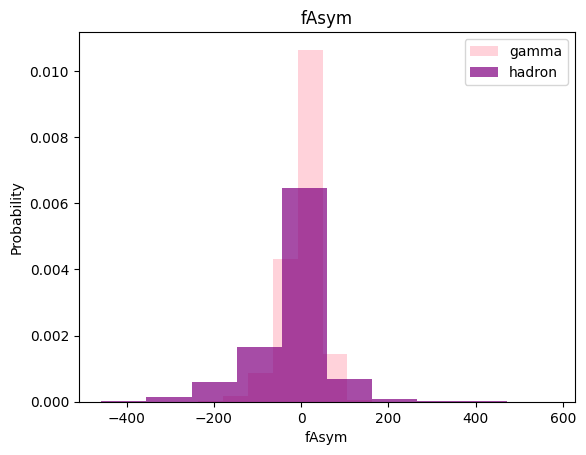

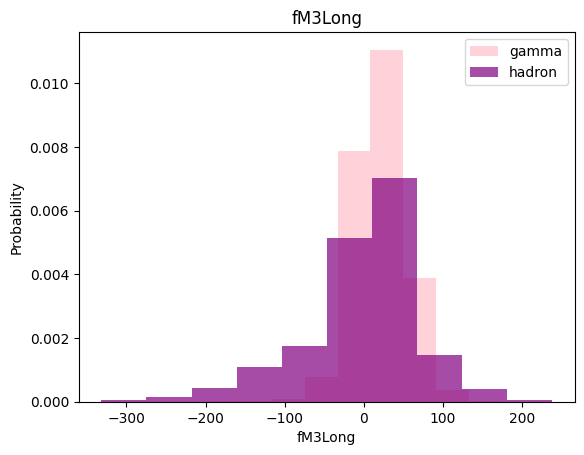

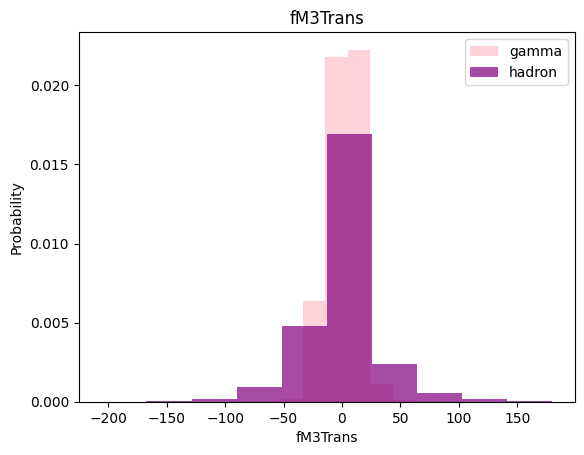

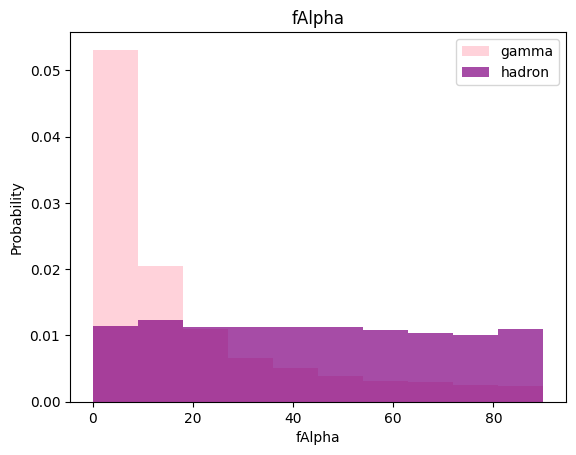

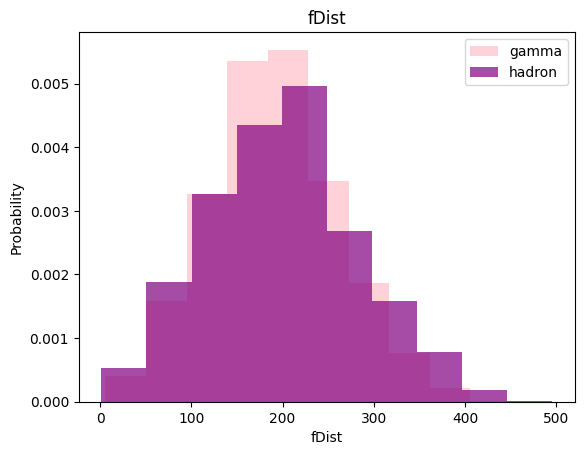

In [8]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1] [label], color='pink', label='gamma', alpha= 0.7, density=True)
    plt.hist(df[df["class"]==0] [label], color='purple', label='hadron', alpha= 0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()


Menunjukan probabilitas, bisa dilihat misal contohnya fLength, semakin panjang fLength nya maka kemungkinan dia adalah hadron, sebaliknya semakin pendek fLength nya maka kemungkinan dia adalah gamma 

## Split Train, Val, and Test 

In [9]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

split nya seperti ini:
 np.split: Fungsi membagi array menjadi beberapa sub-array sebagai tampilan
    Misal:  a = np.arange(1,7)
            results = np.split(a,3)
            
            print(a)
            print(results)
    Hasilnya:
        [1 2 3 4 5 6]
        [array([1, 2]), array([3, 4]), array([5, 6])]

 df.sample: Cuman ngambil sample

 frac=1: Ambil semua data, 100%

 df.sample(frac=1): Ngambil semua data 100% tetapi dia ga berurutan kyk df asli

Misal:
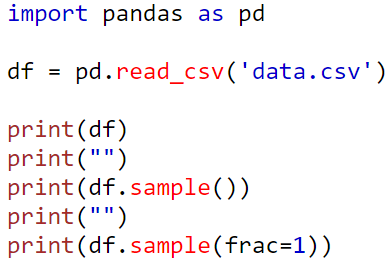

Hasilnya:
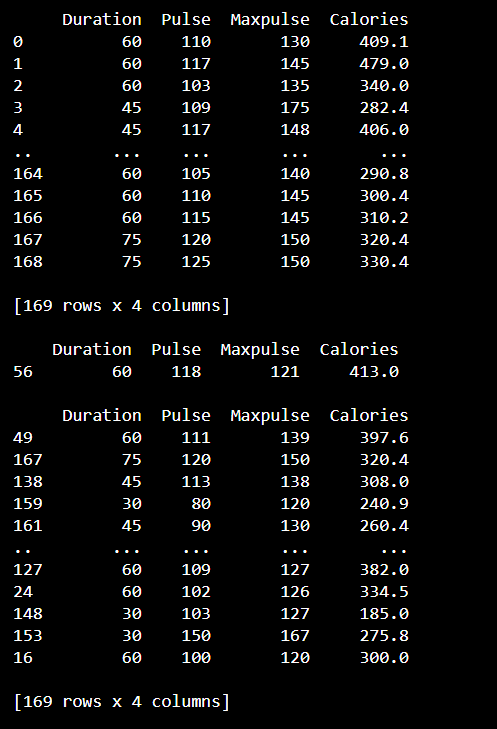

pertama 0.6 itu berarti 60% pertama adalah training set, lalu 60-80% merupakan val set nya, lalu 80-100% nya merupakan test set nya

In [10]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [11]:
print(len(train[train["class"]==1]) )#gammas
print(len(train[train["class"]==0]) )#hadron

7423
3989


Bisa dilihat, train set antar class itu perbandingannya cukup jauh, bisa dikatakan imbalanced, maka dari itu di handle dengan cara ovesampling

In [12]:
train, x_train, y_train= scale_dataset(train, oversample=True)